<a href="https://colab.research.google.com/github/ahmedelalaoui142/myprojects/blob/main/30062024_Stockmarketanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Stock Evolution over time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline


In [3]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
# For time stamps
from datetime import datetime

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day) # here there's 1 year

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)  # globals() ?
    globals()[stock].name = stock

company_list = [AAPL, GOOG, MSFT, AMZN]

GOOG.tail(10) # last 10 rows in the dataframe

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-14,175.852005,178.729996,175.852005,178.369995,178.369995,12361600
2024-06-17,176.979996,179.919998,176.490005,178.779999,178.779999,15272900
2024-06-18,178.789993,178.910004,175.619995,176.449997,176.449997,15640300
2024-06-20,176.710007,178.740005,176.460007,177.710007,177.710007,16753200
2024-06-21,178.490005,182.511993,178.059998,180.259995,180.259995,59728000
2024-06-24,181.279999,182.080002,180.229996,180.789993,180.789993,18198300
2024-06-25,181.145004,185.750000,181.104996,185.580002,185.580002,18917700
2024-06-26,184.199997,185.929993,183.990005,185.369995,185.369995,13375700
2024-06-27,185.645004,187.500000,185.449997,186.860001,186.860001,13025700


Statistics Summary about Data

In [4]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,184.089004,185.667331,182.619681,184.142510,183.667721,6.041452e+07
std,10.837401,10.956965,10.686954,10.783635,10.816926,2.486456e+07
min,165.350006,166.399994,164.080002,165.000000,164.776505,2.404830e+07
25%,175.244995,177.025002,173.660004,175.280006,174.800781,4.678545e+07
50%,183.550003,185.089996,181.919998,183.860001,183.394669,5.366560e+07
75%,191.425003,192.620003,190.209999,191.389999,190.936539,6.642080e+07
max,217.589996,220.199997,213.000000,216.669998,216.669998,2.464214e+08


Informations about the data

In [5]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-06-30 to 2024-06-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


#### closing price

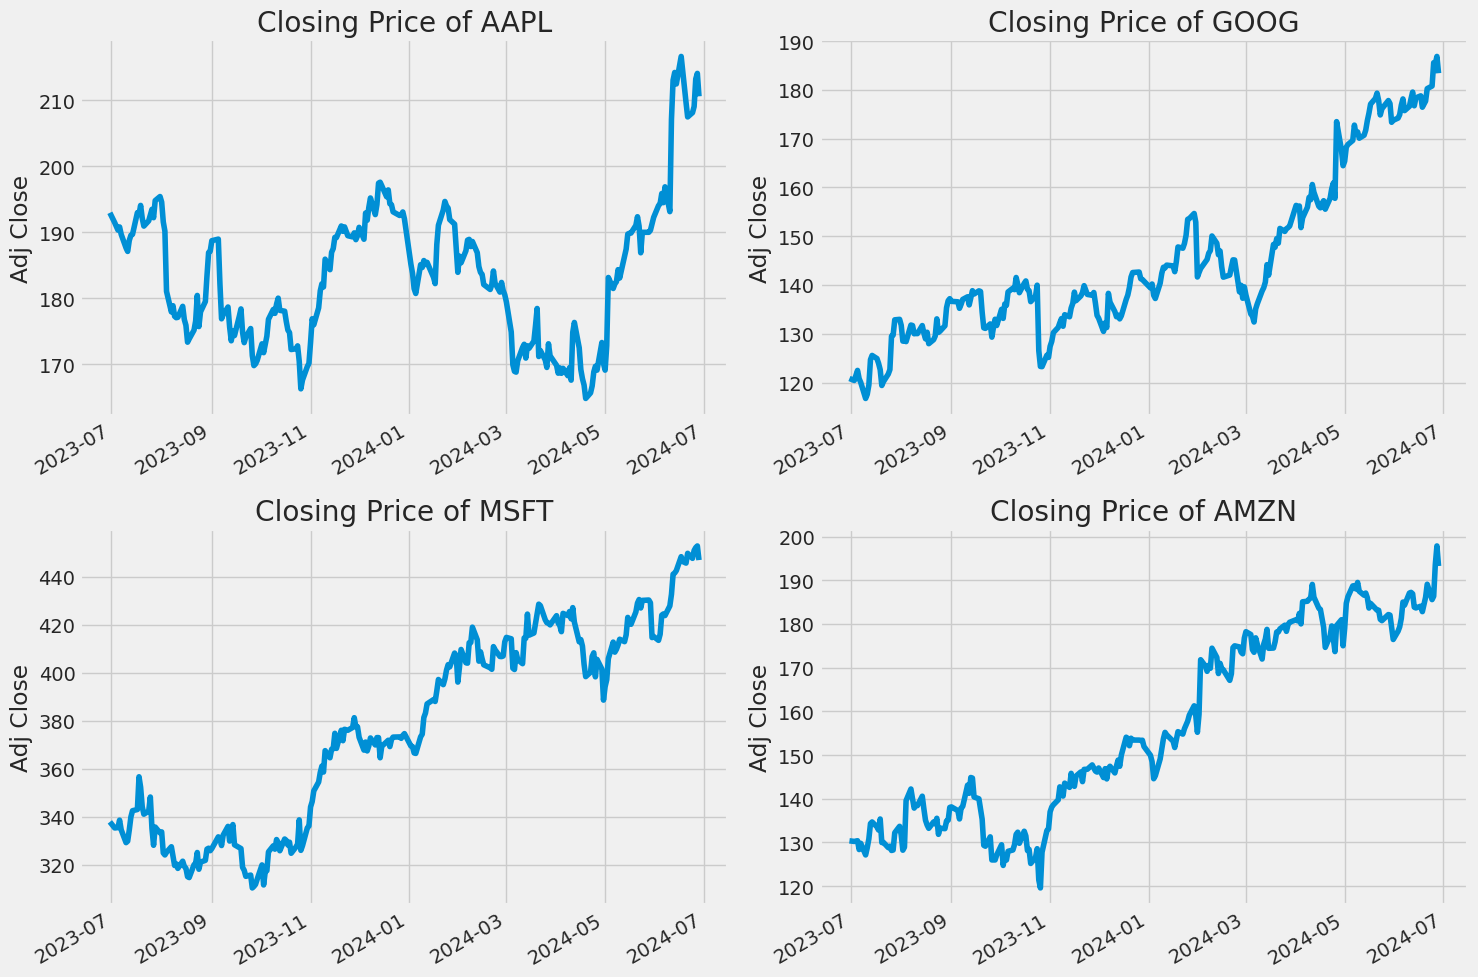

In [6]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company.name}")

plt.tight_layout()

#### Volume of Sales

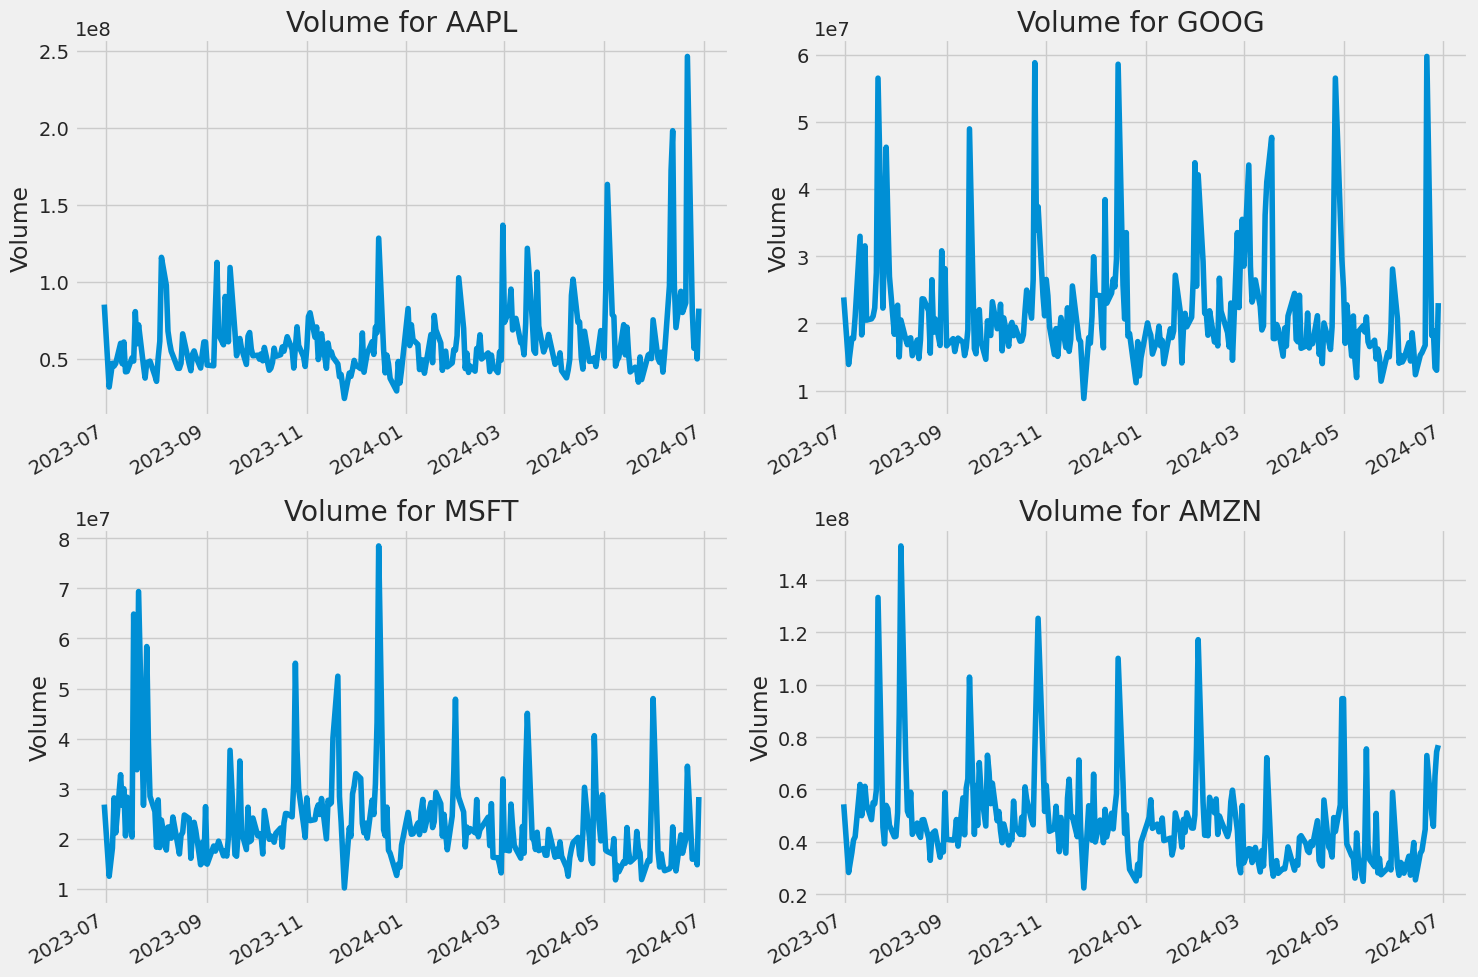

In [7]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Volume for {company.name}")

plt.tight_layout()

### What was the moving average of the various stocks?

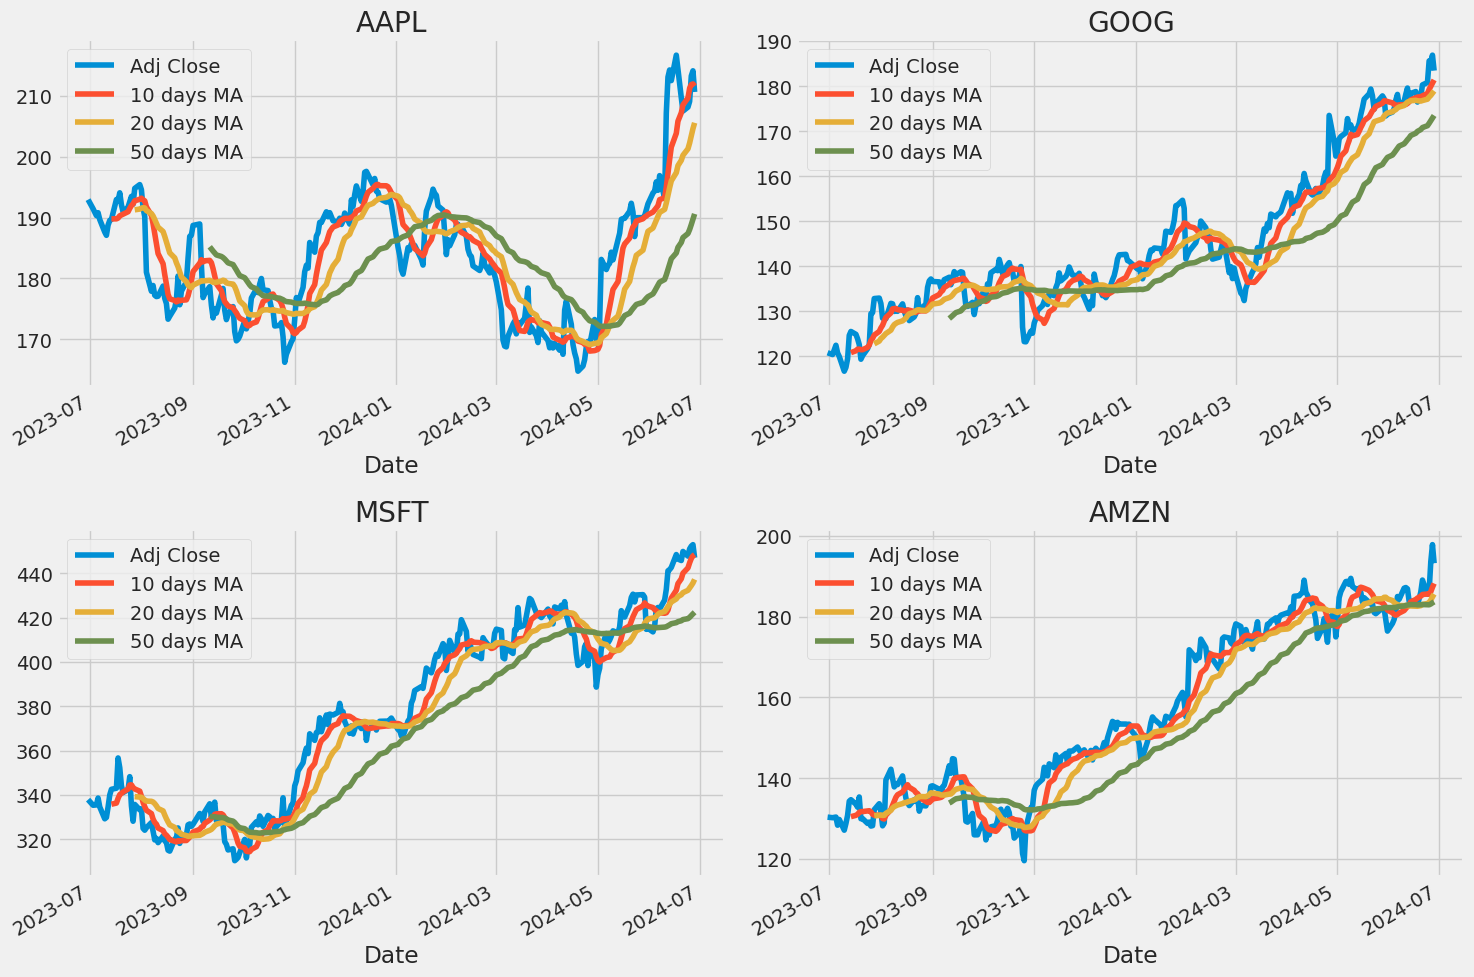

In [8]:
ma_day = [10, 20, 50]

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

def get_axes_indeces(i):
    match i:
        case 0:
            return 0, 0
        case 1:
            return 0, 1
        case 2:
            return 1, 0
        case 3:
            return 1, 1


for i, company in enumerate(company_list):
    for ma in ma_day:
        column_name = f"{ma} days MA"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

    a0, a1 = get_axes_indeces(i)
    company[['Adj Close', '10 days MA', '20 days MA', '50 days MA']].plot(ax=axes[a0,a1])
    axes[a0,a1].set_title(company.name)


fig.tight_layout()